In [10]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_frota = pd.read_csv('datasets/2020-0311_frota_de_veiculos_tratado.csv',
                       usecols=['UF','MUNICIPIO','TIPO DE VEICULO','QUANTIDADE','DATE'],
                       parse_dates=['DATE'],
                       sep=',')

In [5]:
df_frota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001637 entries, 0 to 1001636
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   UF               1001637 non-null  object        
 1   MUNICIPIO        1001637 non-null  object        
 2   TIPO DE VEICULO  1001637 non-null  object        
 3   QUANTIDADE       1001637 non-null  int64         
 4   DATE             1001637 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 38.2+ MB


In [6]:
df_frota.describe()

,QUANTIDADE
count,1.001637e+06
mean,8.923201e+02
std,2.089479e+04
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+01
75%,1.320000e+02
max,5.953694e+06


In [7]:
# Criando MultiIndex e ordenando por UF/MUNICIPIO/DATE
df_frota.set_index(['UF', 'MUNICIPIO', 'DATE', 'TIPO DE VEICULO', 'QUANTIDADE'], inplace=True)
df_frota.sort_values(df_frota.index.names, inplace=True)

### Análises

In [45]:
df_frota_blumenau = df_frota.loc[('SC', 'BLUMENAU', '2020-03-01')]\
                            .reset_index()\
                            .sort_values('QUANTIDADE', ascending=False)

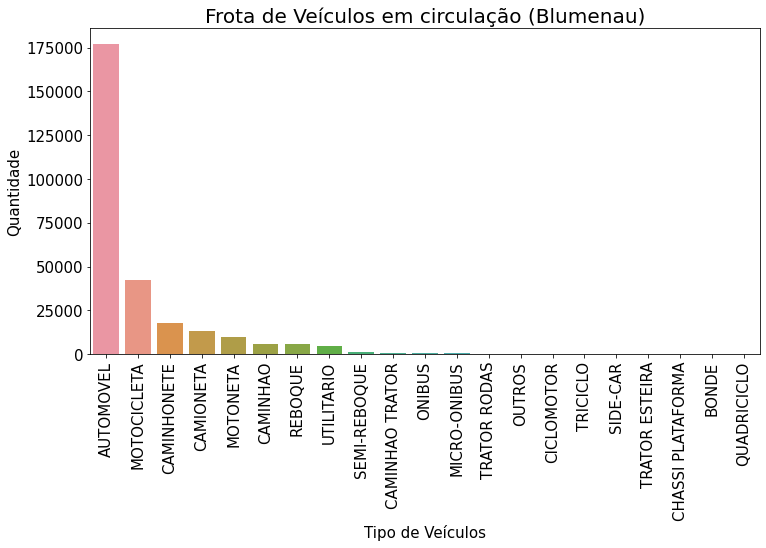

In [47]:
plt.figure(figsize=(12, 6))

sns.barplot(x='TIPO DE VEICULO', y='QUANTIDADE', data=df_frota_blumenau);

plt.xlabel('Tipo de Veículos', fontsize=15)
plt.xticks(rotation=90, fontsize=15)

plt.ylabel(f'Quantidade', fontsize=15)
plt.yticks(fontsize=15)

plt.title(f'Frota de Veículos em circulação (Blumenau)', fontsize=20)
plt.show();